<a href="https://colab.research.google.com/github/jcpalaciosb/Predicion_de_ventas/blob/main/Proyecto_Prediccion_de_Ventas.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# PROYECTO 1

## Datos Personales

* **Nombre Completo**: Juan Carlos Palacios Banchero
* **ID Coding Dojo**: 81390
* **Track**: Data Science Fundamentals
* **Nombre del proyecto**: PREDICCION DE VENTAS
* **Parte Nro.**: Final


## Descripcion del Proyecto

Se trata de ayudar al minorista a comprender las propiedades de los productos y los puntos de venta que desempeñan un papel crucial en el aumento de las ventas.

## Descripción del Conjunto de Datos


| Nombre de la variable     | Descripción                                                                                                        |
|---------------------------|--------------------------------------------------------------------------------------------------------------------|
| Item_Identifier           | Identificación única del producto                                                                                  |
| Item_Weight               | Peso del producto                                                                                                  |
| Item_Fat_Content          | Si el producto es bajo en grasa o regular                                                                          |
| Item_Visibility           | Porcentaje de la superficie total de exposición de todos los productos de una tienda asignada al producto concreto |
| Item_Type                 | Categoría a la que el producto pertenece                                                                           |
| Item_MRP                  | Precio máximo de venta al público (precio de catálogo) del producto                                                |
| Outlet_Identifier         | Identificación única de la tienda                                                                                  |
| Outlet_Establishment_Year | El año en que se estableció la tienda                                                                              |
| Outlet_Size               | El tamaño de la tienda en cuanto al área total                                                                     |
| Outlet_Location_Type      | El tipo de área donde se encuentra la tienda                                                                       |
| Outlet_Type               | Si el punto de venta es una tienda de comestibles o algún tipo de supermercado                                     |
| Item_Outlet_Sales         | Ventas del producto en una tienda particular. Es la variable objetivo a predecir.                                  |

## Objetivo

El objetivo es hacer una predicción de ventas para productos alimenticios vendidos en diversas tiendas.

# PARTE 1

1) Crea un repositorio GitHub que albergará el primer proyecto de portafolio. Sigan las instrucciones en el video de abajo para ayudarlos a completar esta tarea.

2) Usen Pandas para leer el conjunto de datos de predicción de ventas en un cuaderno de Google Colab y verifiquen los datos utilizando el comando df.head().

3) Agreguen el cuaderno de Google Colab al repositorio de GitHub.  Abran la pestaña de “archivo” y hagan clic en “Guardar copia en Github”.

In [1]:
# montaje y carga de datos
import pandas as pd
filename="/content/sales_predictions.csv"
df = pd.read_csv(filename)
df.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


# PARTE 2 (base)

Exploren los datos - ¿Qué necesitan para limpiar estos datos? ¡Límpienlos!  
Asegúrense de abordar cada una de las siguientes tareas:

1) ¿Cuántas filas y columnas?

2) ¿Cuáles son los tipos de datos en cada variable?

3) ¿Hay duplicados? Si es el caso, eliminen algunos duplicados.

4) Identifiquen los valores faltantes.

5) Decidan cómo abordar los valores faltantes y cómo hacerlo. (Esto requiere sus criterios, así que expliquen su elección).

6) Confirmen que no hay valores faltantes después de abordarlos.

7) Encuentren y arreglen alguna categoría inconsistente de datos (example: fix cat, Cat, and cats so that they are consistent) 

8) Para cualquier columna numérica, obtengan las estadísticas resumidas para cada uno (mínimo, máximo y media)


## Análisis Exploratorio

1) Cantidad de filas y columnas

In [2]:
df.shape

(8523, 12)

2) Tipo de datos en cada variable

In [3]:
df.dtypes

Item_Identifier               object
Item_Weight                  float64
Item_Fat_Content              object
Item_Visibility              float64
Item_Type                     object
Item_MRP                     float64
Outlet_Identifier             object
Outlet_Establishment_Year      int64
Outlet_Size                   object
Outlet_Location_Type          object
Outlet_Type                   object
Item_Outlet_Sales            float64
dtype: object

3) Revision si hay duplicados

In [4]:
df.columns.duplicated()   # revision en columnas

array([False, False, False, False, False, False, False, False, False,
       False, False, False])

In [5]:
df.duplicated().sum()   # revision en filas

0

 - No hay duplicados ni en filas ni en columnas

4) Revision de la existencia de datos faltantes

In [6]:
df.isna().sum()

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

5 ) Valores faltantes a trabajar 

* Del resultado anterior, se identifica a las categorias "Item_Weight" e "Outlet_Size" como unicas con valores faltantes. En ambos casos ambas cantidades 1463 y 2410 respectivamente, no supera el 50% de la data y considerando que ademas contienen informacion posiblemente relevante para las
predicciones de venta y requerimiento de artificios de agrupamiento

In [7]:
# Revision de la Categoria "Item_Weight":

* Esta categoria es del tipo flotante y contiene el peso de los productos, esta directamente relacionada a los datos del producto.

In [8]:
df["Item_Weight"].head()

0     9.30
1     5.92
2    17.50
3    19.20
4     8.93
Name: Item_Weight, dtype: float64

In [9]:
df["Item_Weight"].value_counts()

12.150    86
17.600    82
13.650    77
11.800    76
15.100    68
          ..
7.275      2
7.685      1
9.420      1
6.520      1
5.400      1
Name: Item_Weight, Length: 415, dtype: int64

In [10]:
df["Item_Weight"].unique()

array([ 9.3  ,  5.92 , 17.5  , 19.2  ,  8.93 , 10.395, 13.65 ,    nan,
       16.2  , 11.8  , 18.5  , 15.1  , 17.6  , 16.35 ,  9.   , 13.35 ,
       18.85 , 14.6  , 13.85 , 13.   ,  7.645, 11.65 ,  5.925, 19.25 ,
       18.6  , 18.7  , 17.85 , 10.   ,  8.85 ,  9.8  , 13.6  , 21.35 ,
       12.15 ,  6.42 , 19.6  , 15.85 ,  7.39 , 10.195,  9.895, 10.895,
        7.905,  9.195,  8.365,  7.97 , 17.7  , 19.35 ,  8.645, 15.6  ,
       18.25 ,  7.855,  7.825,  8.39 , 12.85 , 19.   ,  5.905,  7.76 ,
       16.75 , 15.5  ,  6.055,  6.305, 20.85 , 20.75 ,  8.895, 19.7  ,
        8.75 , 13.3  ,  8.31 , 19.75 , 17.1  , 10.5  ,  6.635, 14.15 ,
        8.89 ,  9.1  ,  7.5  , 16.85 ,  7.485, 11.6  , 12.65 , 20.25 ,
        8.6  , 12.6  ,  8.88 , 20.5  , 13.5  ,  7.235,  6.92 ,  8.02 ,
       12.8  , 16.6  , 14.   , 16.   , 21.25 ,  7.365, 18.35 ,  5.465,
        7.27 ,  6.155, 19.5  , 15.2  , 14.5  , 13.1  , 12.3  , 11.1  ,
       11.3  ,  5.75 , 11.35 ,  6.525, 10.3  ,  5.78 , 11.85 , 18.75 ,
      

* Por los datos mostrados como valores unicos anterior, un valor adecuado en este caso para completar la data faltante es la mediana de la serie, por lo que se completara con la mediana de los valores existentes, ya que esta representa el valor que ocupa el lugar central de todos los datos de una serie y no seria necesario buscar alguna otra relacion con las otras columnas con datos de productos

In [11]:
mediana = df['Item_Weight'].median()
df['Item_Weight'].fillna(mediana, inplace=True)
df['Item_Weight'].isna().sum()          # verificacion

0

In [12]:
# Revision de la Categoria "Outlet_Size":
# Esta categoria es del tipo object y contiene el tipo de area donde se encuentra la tienda.

In [13]:
df["Outlet_Size"].head()

0    Medium
1    Medium
2    Medium
3       NaN
4      High
Name: Outlet_Size, dtype: object

In [14]:
df["Outlet_Size"].value_counts()

Medium    2793
Small     2388
High       932
Name: Outlet_Size, dtype: int64

* En este caso, por los valores de la serie se ve que es una data alfanumerica indicando los tamaños de tienda (Medium, Small y High), por lo que no corresponde asignar algun valor estadistico como en el caso anteior a la data
faltante, por lo que se analizara el resto de la informacion relacionadas
con los outlets o tiendas.

* La identificacion de la tienda y el año en el que se establecio (Outlet_Identifier y Outlet_Establishment_Year) son datos basicamente de referencia identificatoria con mucha data que no ayudara a completar los datos

* las demas categorias (Outlet_Location_Type, Outlet_Type y Item_Outlet_Sales) si podrian tener alguna relacion con el tamaño de la tienda como para usarlos para completar la data faltante, lo que se vera a continuacion:

In [15]:
df[["Outlet_Size","Outlet_Location_Type","Outlet_Type","Item_Outlet_Sales"]].head()      

,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,Medium,Tier 1,Supermarket Type1,3735.1380
1,Medium,Tier 3,Supermarket Type2,443.4228
2,Medium,Tier 1,Supermarket Type1,2097.2700
3,NaN,Tier 3,Grocery Store,732.3800
4,High,Tier 3,Supermarket Type1,994.7052


* Veamos las relaciones con el promedio de las ventas que son valores numericos 

In [16]:
df.groupby(["Outlet_Size", "Outlet_Location_Type", "Outlet_Type"])["Item_Outlet_Sales"].mean()

Outlet_Size  Outlet_Location_Type  Outlet_Type      
High         Tier 3                Supermarket Type1    2298.995256
Medium       Tier 1                Supermarket Type1    2348.354635
             Tier 3                Supermarket Type2    1995.498739
                                   Supermarket Type3    3694.038558
Small        Tier 1                Grocery Store         340.329723
                                   Supermarket Type1    2277.844267
             Tier 2                Supermarket Type1    2438.841866
Name: Item_Outlet_Sales, dtype: float64

* Encabezaremos el agrupamiento con la categoria de mas valores, poniendo al final la de Tamaño

In [17]:
df.groupby(["Outlet_Type","Outlet_Location_Type","Outlet_Size"])["Item_Outlet_Sales"].mean()

Outlet_Type        Outlet_Location_Type  Outlet_Size
Grocery Store      Tier 1                Small           340.329723
Supermarket Type1  Tier 1                Medium         2348.354635
                                         Small          2277.844267
                   Tier 2                Small          2438.841866
                   Tier 3                High           2298.995256
Supermarket Type2  Tier 3                Medium         1995.498739
Supermarket Type3  Tier 3                Medium         3694.038558
Name: Item_Outlet_Sales, dtype: float64

* parece que el tipo de locacion no ayuda mucho, asi que no lo consideraremos y se evaluaran tanto juntas como por separado las otras dos:

In [18]:
df.groupby(["Outlet_Location_Type","Outlet_Size"])["Item_Outlet_Sales"].mean()

Outlet_Location_Type  Outlet_Size
Tier 1                Medium         2348.354635
                      Small          1576.192909
Tier 2                Small          2438.841866
Tier 3                High           2298.995256
                      Medium         2847.959679
Name: Item_Outlet_Sales, dtype: float64

In [19]:
df.groupby("Outlet_Size")["Item_Outlet_Sales"].mean()

Outlet_Size
High      2298.995256
Medium    2681.603542
Small     1912.149161
Name: Item_Outlet_Sales, dtype: float64

In [20]:
df.groupby("Outlet_Location_Type")["Item_Outlet_Sales"].mean()

Outlet_Location_Type
Tier 1    1876.909159
Tier 2    2323.990559
Tier 3    2279.627651
Name: Item_Outlet_Sales, dtype: float64

* Se observa que los valores promedio del volumen de ventas en ambas categorias son similares relacionando a High con Tier 3, Medium con Tier 1 y Small con Tier 2 por lo tanto se completara los datos faltantes de la categoria Outlet_Size con el valor High, Medium o Small segun la tabla siguiente:

 - High, si el valor de ventas correspondiente esta entre 2,500 y mas dolares (similar a Tier 2)

 - Medium si el valor promedio de ventas esta entre 2,000 y 2,500)

 - Small si el valor del promedio de ventas correspondiente al indice de Outlet_Location_Type esta entre 0 y 2000 dolares

In [21]:
largo = len(df["Outlet_Location_Type"])
x=0
for x in range(0,largo):
  valor = df["Outlet_Size"][x]
  ventas=df["Item_Outlet_Sales"][x]
  anterior=valor
  if valor=="High" or valor=="Medium" or valor=="Small":
     valor=anterior       # instruccion para poder usar el else 
  else:                   # para trabajar los datos faltantes
    if ventas<2000:
      valor="Small"
    elif ventas<=2500:
      valor="Medium"
    else:
      valor="High"
  df["Outlet_Size"]=df["Outlet_Size"].replace(anterior,valor)
  x=x+1

6) Confirmen que no hay valores faltantes después de abordarlos

In [22]:
df["Outlet_Size"].isna().sum()

0

7) Encuentren y arreglen alguna categoría inconsistente de datos 

In [23]:
df["Item_Identifier"].unique()

array(['FDA15', 'DRC01', 'FDN15', ..., 'NCF55', 'NCW30', 'NCW05'],
      dtype=object)

In [24]:
df["Item_Fat_Content"].unique()

array(['Low Fat', 'Regular', 'low fat', 'LF', 'reg'], dtype=object)

* Esta categoria tiene inconsistencia en los valores low fat, LF y reg que se procede a corregir

In [25]:
df["Item_Fat_Content"] = df["Item_Fat_Content"].replace("low fat","Low Fat")
df["Item_Fat_Content"] = df["Item_Fat_Content"].replace("LF","Low Fat")
df["Item_Fat_Content"] = df["Item_Fat_Content"].replace("reg","Regular")

In [26]:
# comprobacion:
df["Item_Fat_Content"].unique()

array(['Low Fat', 'Regular'], dtype=object)

8) Obtencion de las estadísticas de una categoria resumidas para cada uno (mínimo, máximo y media)

In [27]:
df["Item_Outlet_Sales"].describe()

count     8523.000000
mean      2181.288914
std       1706.499616
min         33.290000
25%        834.247400
50%       1794.331000
75%       3101.296400
max      13086.964800
Name: Item_Outlet_Sales, dtype: float64

## Conclusiones a Parte 2:

Del analisis exploratorio de la data, podemos concluir en lo siguiente:

 - Se identificaron a las categorias "Item_Weight" y "Outlet_Size" como unicas con valores faltantes. Al no superar en ninguno de los dos casos el 50% de la data y ante la posibilidad de ser posiblemente relevantes para las predicciones de ventas se decide completar estos valores faltantes con la media aritmetica en el caso de "Item_Weight" y en el caso de "Outlet_Size" con un valor de HIgh, Medium o Low en funcion a una escala del valor promedio de las ventas y su ubicacion en el indice de la categoria Outlet_Location_Type

- Se vio que no hay duplicados ni de filas ni de columnas en la data

- La categoria "Item_Fat_Content" presenta inconsistencia en los valores low fat, LF y reg, los cuales se corrigieron correspondientemente


# PARTE 3 (base)

Para la tercera parte, la tarea es completar cualquier análisis estadístico que los puedan a ayudar a comprender, explicar o moldear sus datos. Esto debe incluir al menos uno de cada:

 - Histograma para ver las distribuciones de diversas características en el conjunto de datos.

 - Boxplot para ver resúmenes estadísticos de diversas características en el conjunto de datos.

 - Mapa de calor de la correlación entre las características.

## Visualizaciones

In [28]:
# carga de librerias adicionales a pandas para hacer lsa visualizaciones

In [29]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

* Se mostrara un histograma para mostrar la distribucion de los datos de todas las caracteristicas con informacion numerica:

 - Item_Weight                  (float64)
 - Item_Visibility              (float64)
 - Item_MRP                     (float64)
 - Outlet_Establishment_Year      (int64)
 - Item_Outlet_Sales            (float64)

* Para la visualizacion en Boxplot, se compararan las dos primeras (peso y veisibilidad) y la tercera y la ultimas (precios y ventas)

In [30]:
# Histogramas

In [31]:
lista=np.array(["Item_Weight", "Item_Visibility", "Item_MRP", "Outlet_Establishment_Year", "Item_Outlet_Sales"])  # columnas a usar
colores=np.array(["blue", "red", "green", "yellow", "orange"])     # se dara un color a cada histograma

* Dado que los codigos son practiamente los mismos, se usara un bucle for para hacerlo

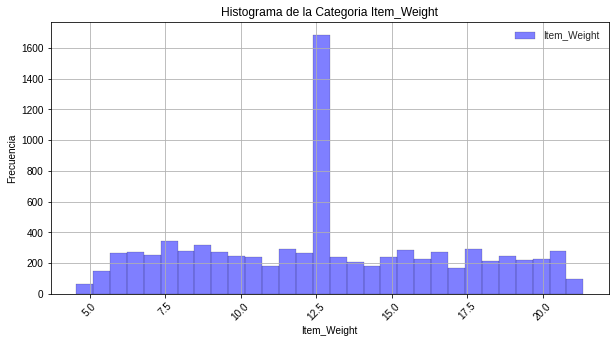

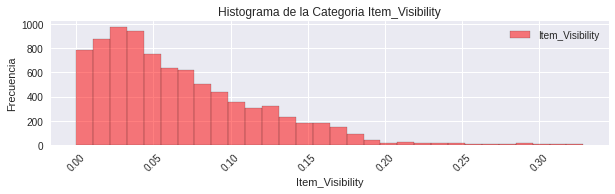

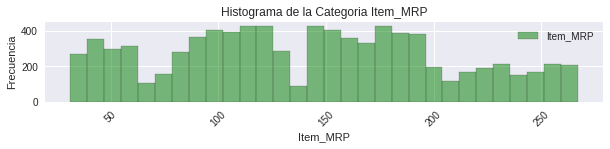

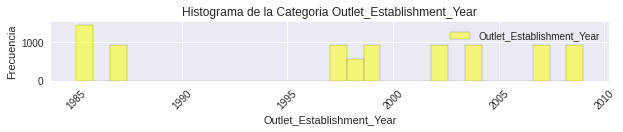

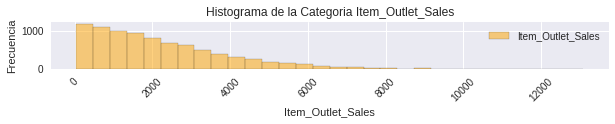

In [32]:
for x in range(0, len(lista)):
  fig = plt.figure(figsize=(10, 5))
  plt.subplot(x+1, 1, 1)
  variable="Histograma de la Categoria "+lista[x]
  plt.title(variable)
  plt.xlabel(lista[x])     # agrega sub-titulo al eje x
  plt.ylabel("Frecuencia") # agrega sub-titulo al eje y
  plt.style.use('seaborn')
  df.loc[:, lista[x]].hist(bins = 30, legend=" ", color=colores[x], edgecolor='black', alpha=0.5) 
  plt.xticks(rotation = 45) # rotacion de los valores del eje x para que no se monten
  plt.ticklabel_format(useOffset=False, style='plain')  # quitamos la notacion cientifica inicial

 - De los histogramas mostrados, podemos concluir que la categoria Item Weighs es la unica que presenta una distribucion normal con un desviacion estandar corta entre sus valores respecto a la media. 

 - Los histogramas de la categorias Item_Visibility e Item_Outlet_Sales estan sesgados hacia la derecha de la media.

 - El histograma de la categoria Item_MRP tambien es parecido a una distribucion normal tambien con desviacion estandar corta 

 - El histograma de la categoria Outlet_Establishment_Year, muestra un dispersion total de datos dado que se trata de años

In [33]:
# Boxplots

* Pesos y Visibilidad:

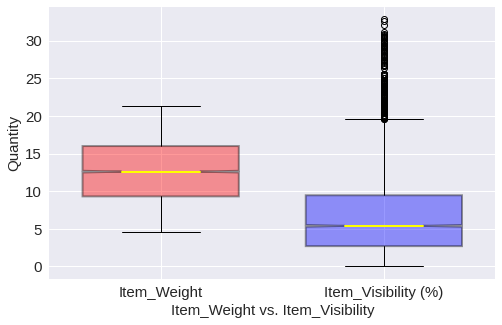

In [34]:
peso = df.loc[:,"Item_Weight"]
visibilidad = np.array(df.loc[:,"Item_Visibility"])*100  # para llevar los indices a porcentajes para mejorar el boxplot
fig, axes = plt.subplots(nrows = 1, ncols = 1, figsize = (8,5))
boxplots = axes.boxplot([peso, visibilidad],
           notch = True,
           labels=["Item_Weight", "Item_Visibility (%)"],
           widths = .7,
           patch_artist=True,
           medianprops = dict(linestyle='-', linewidth=2, color='Yellow'),
           boxprops = dict(linestyle='--', linewidth=2, color='Black', facecolor = 'blue', alpha = .4)
          );
boxplot1 = boxplots['boxes'][0]
boxplot1.set_facecolor('red')
plt.xlabel("Item_Weight vs. Item_Visibility", fontsize = 15);
plt.ylabel("Quantity", fontsize = 15);
plt.xticks(fontsize = 15);
plt.yticks(fontsize = 15);

* Precios y Ventas:

La caracteristica Item_Visibililty se ha llevado a porcentajes para poder visualizar mejor ambas caracteristicas, en este caso nuevamente se refleja al igual que el histograma que la caracteristica Item_Weight presenta una distribicion normal de los datos con corta desviacion estandar. En cambio los datos de Item_Visibility tienden a ubicarse hacia la derecha. 

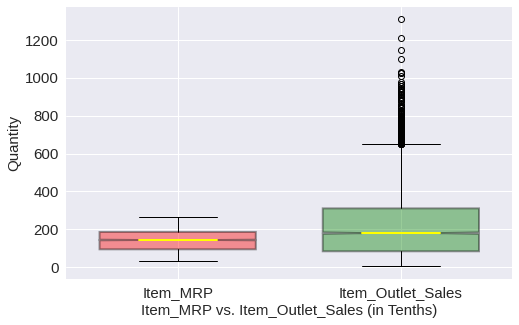

In [35]:
precios = df.loc[:,"Item_MRP"]
ventas = np.array(df.loc[:,"Item_Outlet_Sales"])/10 # para trabajar las ventas en decimas
fig, axes = plt.subplots(nrows = 1, ncols = 1, figsize = (8,5))
boxplots = axes.boxplot([precios, ventas],
           notch = True,
           labels=["Item_MRP", "Item_Outlet_Sales"],
           widths = .7,
           patch_artist=True,
           medianprops = dict(linestyle='-', linewidth=2, color='Yellow'),
           boxprops = dict(linestyle='--', linewidth=2, color='Black', facecolor = 'green', alpha = .4)
          );
boxplot1 = boxplots['boxes'][0]
boxplot1.set_facecolor('red')
plt.xlabel("Item_MRP vs. Item_Outlet_Sales (in Tenths)", fontsize = 15);
plt.ylabel("Quantity", fontsize = 15);
plt.xticks(fontsize = 15);
plt.yticks(fontsize = 15);

 - La caracteristica Item_Outlet_Sales se ha llevado a porcentajes para poder visualizar mejor ambas caracteristicas, en este caso nuevamente se refleja al igual que el histograma un sesgo de los datos hacia la derecha, en cambio la de Item_MRP muestra una distribicion normal de los datos con corta desviacion estandar. 

In [36]:
# Mapa de calor de la correlación entre las características.

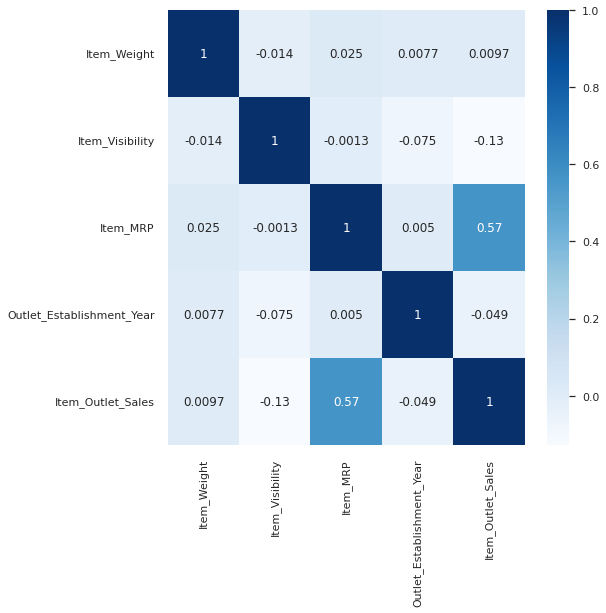

In [37]:
corr = df.corr()
sns.set(rc = {'figure.figsize':(8,8)})
sns.heatmap(corr, cmap = 'Blues', annot = True)

 - Del mapa de calor mostrado, podemos indicar que hay caracteristicas cuyos datos van en el mismo sentido que otros y otras en sentido contrario: sin embargo, respecto a los valores solo se encuentra una correlacion moderada entre las variables de precios y ventas, lo cual es razonable, ya que las ventas esta en funcion a los precios. Las demas variable no tienen correlacion ya que sus valores son menores a 0.3.

## Conclusiones a Parte 3:

De las visualizaciones mostradas en esta parte del proyecto, se puede concluir lo siguiente:

 - Tanto los histogramas mostrados, como los graficos de las estadisticas boxplot nos muestran la distribucion de la data de las categorias "Item_Weight" e "Item_MRP" como una distribucion normal con un desviacion estandar corta, miestras que el resto estan sesgados hacia la derecha de la media, a excepcion de la categoria Outlet_Establishment_Year, que muestra un dispersion total de datos dado que se trata de años.

- El mapa de calor muestra la relacion de las caracteristicas de data numerica, encontrandose una correlacion moderada entre las variables de precios y ventas, lo cual parece ser razonable, ya que las ventas esta en funcion a los precios. Las demas variable no tienen correlacion ya que sus valores son menores a 0.3.

# Parte 4 (base)

El objetivo de esto es ayudar al minorista a comprender las propiedades de los productos y los puntos de venta que desempeñan un papel crucial en el aumento de las ventas.

La tarea es crear numerosas visualizaciones de datos para ayudar a las partes interesadas a comprender mejor las tendencias de los datos. 

• Creen un mínimo de dos visualizaciones de datos para ayudar a otros comprender las tendencias en los datos (análisis de datos explicativos).

• Puesto que estos gráficos son para la elaboración de informes, asegúrense de que tengan un buen aspecto incluyendo títulos, leyendas, etc.

In [38]:
# revision de columnas para analisis

In [39]:
df.columns

Index(['Item_Identifier', 'Item_Weight', 'Item_Fat_Content', 'Item_Visibility',
       'Item_Type', 'Item_MRP', 'Outlet_Identifier',
       'Outlet_Establishment_Year', 'Outlet_Size', 'Outlet_Location_Type',
       'Outlet_Type', 'Item_Outlet_Sales'],
      dtype='object')

## Analisis de las ventas de productos de cada categoria segun contenido graso por tipo de Tienda 

Para esta finalidad vamos a identificar los productos Low Fat y Regular por separado y mostrar la suma de las ventas (en miles de dolares) de estos en cada tipo de tienda. Esto permitira identificar la preferencia de compra de estos tipos de productos en cada tipo de tienda.

In [40]:
# Grafico de Barras

In [41]:
LowFatFilter = df["Item_Fat_Content"] == "Low Fat"
GrupoLowFat = df.loc[LowFatFilter, :].groupby(["Outlet_Type"])["Item_Outlet_Sales"].sum()/1000
GrupoLowFat

Outlet_Type
Grocery Store         240.681374
Supermarket Type1    8257.520583
Supermarket Type2    1201.304937
Supermarket Type3    2204.587639
Name: Item_Outlet_Sales, dtype: float64

In [42]:
RegularFilter = df["Item_Fat_Content"] == "Regular"
GrupoRegular = df.loc[RegularFilter, :].groupby(["Outlet_Type"])["Item_Outlet_Sales"].sum()/1000
GrupoRegular

Outlet_Type
Grocery Store         127.352892
Supermarket Type1    4659.821680
Supermarket Type2     650.517893
Supermarket Type3    1249.338413
Name: Item_Outlet_Sales, dtype: float64

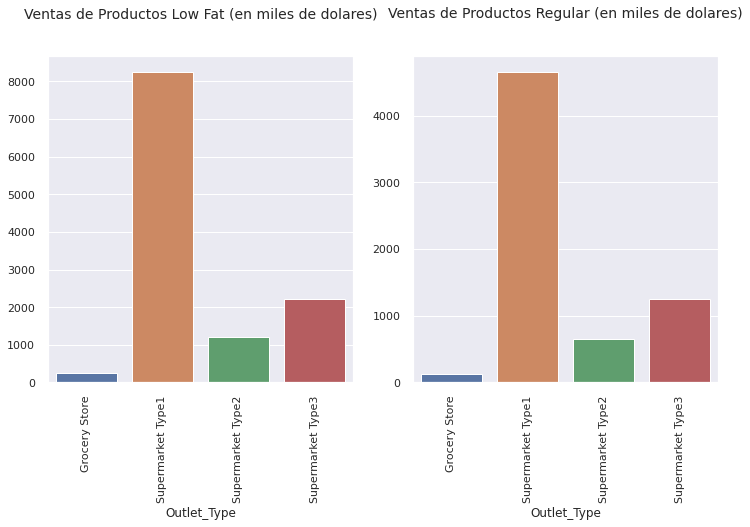

In [43]:
plt.figure(figsize=(12, 6))
# Subplot 1 
plt.subplot(1, 2, 1);
sns.barplot(x = GrupoLowFat.index, y = GrupoLowFat.values);
plt.xticks(rotation = 90);
plt.title("Ventas de Productos Low Fat (en miles de dolares)\n\n", fontsize = 14);
# Subplot 2
plt.subplot(1, 2, 2);
sns.barplot(x = GrupoRegular.index, y = GrupoRegular.values);
plt.xticks(rotation = 90);
plt.title("Ventas de Productos Regular (en miles de dolares)\n\n", fontsize = 14);

 - Por los resultados mostrados, podemos concluir que en los Supermercados Tipo 1 hay una preferenica mucho mayor por los productos de menor contenido graso, no tanto asi para los demas tipo de tienda, excpto en el Supermercado Tipo 3 pero con una diferencia no muy marcada.

 - Para complementar este analisis vemos como se distribuye el porcentaje de las ventas por cada tipo de tienda, para ver donde debemos concentrar el esfuerzo en la clasificacion de productos.

In [44]:
VentasTiendas = df.groupby(["Outlet_Type"])["Item_Outlet_Sales"].sum()
VentasTiendas

Outlet_Type
Grocery Store        3.680343e+05
Supermarket Type1    1.291734e+07
Supermarket Type2    1.851823e+06
Supermarket Type3    3.453926e+06
Name: Item_Outlet_Sales, dtype: float64

In [45]:
# Grafico Pie

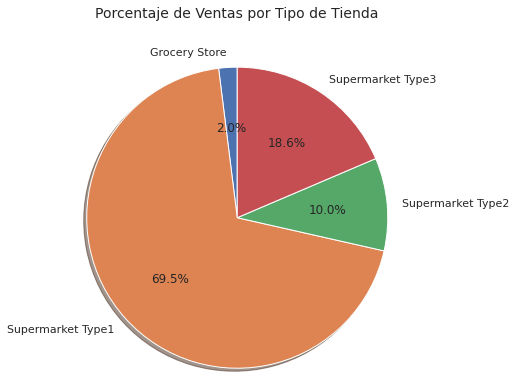

In [46]:
Tipo = VentasTiendas.keys()
Ventas = VentasTiendas.values
explode = (0, 0, 0, 0) 
fig1, ax1 = plt.subplots(figsize=(6, 6))
plt.title("Porcentaje de Ventas por Tipo de Tienda\n\n", fontsize=14)
ax1.pie(Ventas, explode=explode, labels=Tipo, autopct='%1.1f%%', shadow=True, startangle=90)
ax1.axis("equal") 
plt.show()

 - Las ventas en el Supermercado Tipo 1 son sumamente importantes ya que representan el 69.5% del total de las ventas, seguido por los Supermercados tipo 3, considerando ambos se supera el 80% de las ventas totales que requieren un mayor control del abastecimiento de productos de bajo contenido calorico frente a los del tipo regular.

## Analisis de las ventas por cada tipo de tienda y año en que se establecio.

Para esta finalidad vamos a visualizar las ventas en miles de dolares por tipo de tienda y su total segun año en que se establecio. Esto permitira analizar la antiguedad de los tipos de tienda y sus volumentes de compra.

In [47]:
# Identificaicon de Tipos de Tienda
TiposTienda=df["Outlet_Type"].unique()
TiposTienda

array(['Supermarket Type1', 'Supermarket Type2', 'Grocery Store',
       'Supermarket Type3'], dtype=object)

In [48]:
# Calculo de la escala del eje x
minYear=df['Outlet_Establishment_Year'].min()
maxYear=df['Outlet_Establishment_Year'].max()
print(minYear, maxYear)

1985 2009


In [49]:
# Codigo de Barras

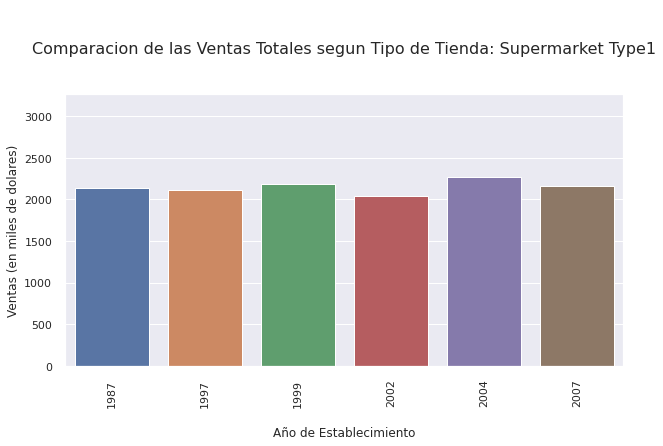

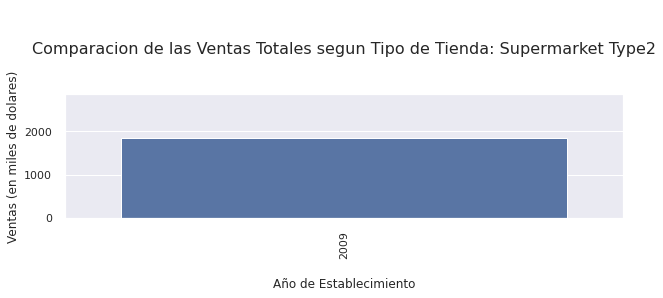

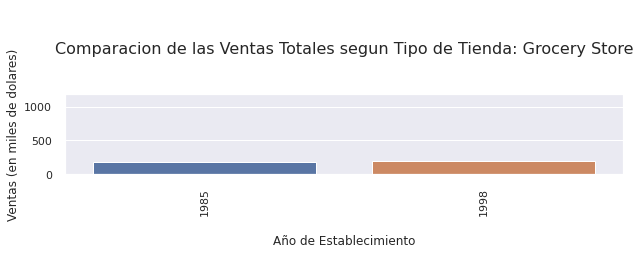

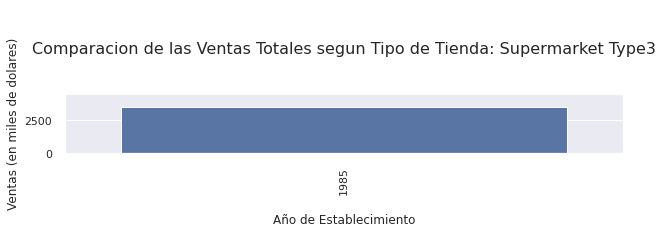

In [50]:
for x in range(0, len(TiposTienda)): # para hacer un grafico por cada tipo de tienda
  Tienda=TiposTienda[x]    
  FiltroTienda=df["Outlet_Type"] == Tienda
  GrupoTienda = df.loc[FiltroTienda, :].groupby(["Outlet_Establishment_Year"])["Item_Outlet_Sales"].sum()/1000  # Ventas por año
  Years=np.array(GrupoTienda.index)
  Sales=np.array(GrupoTienda.values)
  maxSales=Sales.max()+1000  # para dar un margen superior mas grande para mejorar la visualizacion
  fig = plt.figure(figsize=(10, 5))
  plt.subplot(x+1, 1, 1)
  Variable="\n\nComparacion de las Ventas Totales segun Tipo de Tienda: "+Tienda+"\n\n"
  plt.title(Variable, fontsize = 16);
  plt.xticks(rotation = 90);
  plt.xlim(left=minYear,right=maxYear)
  plt.ylim(bottom=0,top=maxSales)
  plt.xlabel('\nAño de Establecimiento', fontsize = 12)
  plt.ylabel('Ventas (en miles de dolares)', fontsize = 12)
  sns.barplot(x = Years, y = Sales);
  

 - De los graficos mostrados, se pude decir que las ventas de los Supermercados tipo 1 y 2, bordean los 2.2 milloners de dolares, las del Supermercado 3 superan los 2.5 millones de dolares y las Grocery Store no llega al cuarto de millon de dolares.

## Conclusiones a Parte 4:



* Existe una correlacion moderada entre las variables de precios y ventas
* En los Supermercados Tipo 1 hay una preferenica mucho mayor por los productos de menor contenido graso
* Las ventas en el Supermercado Tipo 1 son sumamente importantes ya que representan el 69.5% del total de las ventas, seguido por los Supermercados tipo 3, considerando ambos se supera el 80% de las ventas totales que requieren un mayor control del abastecimiento de productos de bajo contenido calorico frente a los del tipo regular.
* Como conclusion final, podemos decir que es de esperar, al menos en los Supermercados tipo 1 que las ventas se mantenga o mejoren segun el cuidado que se le de a la atencion de los productos Low Fat.
Igualmente podriamos decir sobre los Supermercados tipo 3; sin embargo no hay informacion de otra tienda del mismo tipo que se haya establecido.


# Parte 5

El objetivo de este paso es ayudar al distribuidor usando el aprendizaje automático para hacer predicciones sobre futuras ventas basándose en los datos proporcionados.

Para la parte 5, regresarán al conjunto de datos original con el objetivo de evitar una fuga de datos.  

**Nota**: Si imputaron los valores faltantes basados en un cálculo en todo el conjunto de datos (como la media), ahora deben realizar ese paso después de hacer train test split usando SimpleImputer.  

* Identifiquen el objetivo (y) y las características (X): Asignen la columna "Item_Outlet_Sales" como el objetivo y el resto de las variables relevantes como el matriz de características.  
* Realicen un train test split 
* Creen un pipeline de preprocesamiento para preparar el conjunto de datos para el aprendizaje automático.
* Comprometan su trabajo en GitHub. 


In [51]:
# montaje de librerias adicionales y carga de datos nuevamente para obtener el DataFrame original
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.compose import make_column_transformer, make_column_selector
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import train_test_split
from sklearn import set_config
set_config(display='diagram')
filename="/content/sales_predictions.csv"
df = pd.read_csv(filename)
df.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


## * Identifiquen el objetivo (X) y las características (y): Asignen la columna "Item_Outlet_Sales" como el objetivo y el resto de las variables relevantes como el matriz de características.

In [52]:
# Revision nuevamente de la informacion de las columnas
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


**Observacion**

 - Antes de proceder a la identificacion de la variables objetivo y resto de variables recordemos que segun las conclusiones de la parte 2 del proyecto se identificaron a las categorias "Item_Weight" y "Outlet_Size" como unicas con valores faltantes que habria que completar.
 - Tambien se vio que la categoria "Item_Fat_Content" presenta inconsistencia en los valores low fat, LF y reg, los cuales tendra que ser nuevamente corregidos ya que se esta cargado nuevamente la data
 - Las categorias Item_Identifier y Outlet_Identifier representan codigos de identificacion por lo que no se consideraran para la elaboracion del modelo
 - Por ultimo, segun lo que se indico en las conclusiones de la parte 3, el mapa de calor mostro la relacion de las caracteristicas de data numerica, encontrandose solo a la variable precios "Item_MRP" y la variable objetivo  "Item_Outlet_Sales" con una correlacion entre ambas de 0.57, en consecuencia, salvo la cariable "Item_MRP", el resto de variables numericas no se consideraran para la elaboracion del modelo, por lo que no sera necesario completar los datos faltantes de la categoria "Item_Weight".

In [53]:
# Revision de la columna con data faltante Outlet_Size
variables_unicas = df['Outlet_Size'].unique()
variables_nounicas = df['Outlet_Size'].nunique()
variables_cantidades = df['Outlet_Size'].value_counts()
print (f"Variables unicas:\{variables_unicas}\nVariables no unicas:\n{variables_nounicas}:\nCantidades:\n{variables_cantidades}")

Variables unicas:\['Medium' nan 'High' 'Small']
Variables no unicas:
3:
Cantidades:
Medium    2793
Small     2388
High       932
Name: Outlet_Size, dtype: int64


- La variable "Outlet Size" tiene datos faltantes, se completara la data faltante siguiendo el mismo criterio que se uso en la parte 2 del proyecto y se le asignara la codificacion correspondiente a traves de un pipeline.

In [54]:
# repetimos el codigo de la Parte 2
largo = len(df["Outlet_Location_Type"])
x=0
for x in range(0,largo):
  valor = df["Outlet_Size"][x]
  ventas=df["Item_Outlet_Sales"][x]
  anterior=valor
  if valor=="High" or valor=="Medium" or valor=="Small":
     valor=anterior       # instruccion para poder usar el else 
  else:                   # para trabajar los datos faltantes
    if ventas<2000:
      valor="Small"
    elif ventas<=2500:
      valor="Medium"
    else:
      valor="High"
  df["Outlet_Size"]=df["Outlet_Size"].replace(anterior,valor)
  x=x+1
  df['Outlet_Size'].value_counts() # verificacion

In [55]:
# Revision de la columna con data faltante Item_Fat_Content
variables_unicas = df['Item_Fat_Content'].unique()
variables_nounicas = df['Item_Fat_Content'].nunique()
variables_cantidades = df['Item_Fat_Content'].value_counts()
print (f"Variables unicas:\{variables_unicas}\nVariables no unicas:\n{variables_nounicas}:\nCantidades:\n{variables_cantidades}")

Variables unicas:\['Low Fat' 'Regular' 'low fat' 'LF' 'reg']
Variables no unicas:
5:
Cantidades:
Low Fat    5089
Regular    2889
LF          316
reg         117
low fat     112
Name: Item_Fat_Content, dtype: int64


In [56]:
# correccion de las inconsistencias LF, reg y low fat a traves de un replace y verificamos
df["Item_Fat_Content"] = df["Item_Fat_Content"].replace("low fat","Low Fat")
df["Item_Fat_Content"] = df["Item_Fat_Content"].replace("LF","Low Fat")
df["Item_Fat_Content"] = df["Item_Fat_Content"].replace("reg","Regular")
df['Item_Fat_Content'].value_counts() # verificacion

Low Fat    5517
Regular    3006
Name: Item_Fat_Content, dtype: int64

* La variable "Item_Fat_Content" representa una caracteristica del tipo object, tambien sera codificada a traves de un pipeline pero antes de hacerlo se han corregido nuevamente las inconsitencias.

 ## - Asignacion del objetivo y y las caracteristicas X

In [57]:
# asignacion de objetivo y, y las características X
y = df['Item_Outlet_Sales']
# dropeamos variables objetivo y las numericas que no son relevante segun el mapa de calor 
X = df.drop(columns = ['Item_Outlet_Sales', 'Item_Identifier','Item_Weight', 'Item_Visibility', 'Outlet_Identifier', 'Outlet_Establishment_Year', 'Outlet_Size' ])  

In [58]:
X.head() # revision

,Item_Fat_Content,Item_Type,Item_MRP,Outlet_Location_Type,Outlet_Type
0,Low Fat,Dairy,249.8092,Tier 1,Supermarket Type1
1,Regular,Soft Drinks,48.2692,Tier 3,Supermarket Type2
2,Low Fat,Meat,141.6180,Tier 1,Supermarket Type1
3,Regular,Fruits and Vegetables,182.0950,Tier 3,Grocery Store
4,Low Fat,Household,53.8614,Tier 3,Supermarket Type1


## - Realicen un train test split

In [59]:
# Train test split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 42)

## *   Creen un pipeline de preprocesamiento para preparar el conjunto de datos para el aprendizaje automático






 - **Revision de la informacion de la data de entrenamiento y prueba**

In [60]:
X_train.info() # data de entrenamiento

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6392 entries, 4776 to 7270
Data columns (total 5 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Item_Fat_Content      6392 non-null   object 
 1   Item_Type             6392 non-null   object 
 2   Item_MRP              6392 non-null   float64
 3   Outlet_Location_Type  6392 non-null   object 
 4   Outlet_Type           6392 non-null   object 
dtypes: float64(1), object(4)
memory usage: 299.6+ KB


In [61]:
X_test.info()  # data de prueba

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2131 entries, 7503 to 1784
Data columns (total 5 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Item_Fat_Content      2131 non-null   object 
 1   Item_Type             2131 non-null   object 
 2   Item_MRP              2131 non-null   float64
 3   Outlet_Location_Type  2131 non-null   object 
 4   Outlet_Type           2131 non-null   object 
dtypes: float64(1), object(4)
memory usage: 99.9+ KB


**Observacion**

 - Se realizaran dos pipelines: uno para el escalamiento de la variable numerica Item_MRP con el transformador StandardScaler() y otro para las variables categoricas, con el transformador OneHotEncoder() y StandardScaler(), para aplicarlos a las variables de entrenamiento. 

 - Cabe mencionar que para esta etapa no tenemos ya ingun dato faltante que completar con el transformador SimpleImputer ya que la data faltante de la variable Outlet_Size se decidio completar en funcion al volumen de ventas ya que hacerlo mediante la data de mayor frecuencia no se considera aplizable en este caso porque probablemente se estaria distorcionando la informacion para la proyeccion.

In [62]:
# Selector de columnas
cat_selector = make_column_selector(dtype_include='object') # categoricas
num_selector = make_column_selector(dtype_include='number') # numericas


In [63]:
# One-hot encoder
ohe = OneHotEncoder(handle_unknown='ignore', sparse=False)
# Scaler
scaler = StandardScaler()

In [64]:
# Instanciamiento del Pipeline numerico
numeric_pipe = make_pipeline(scaler)
numeric_pipe


Pipeline(steps=[('standardscaler', StandardScaler())])

In [65]:
# Instanciamiento del Pipeline categorico
categorical_pipe = make_pipeline(ohe)
categorical_pipe

Pipeline(steps=[('onehotencoder',
                 OneHotEncoder(handle_unknown='ignore', sparse=False))])

In [66]:
# nombres de columnas para aplicar el Column Transformer de los pipelines
number_tuple = (numeric_pipe, num_selector)
category_tuple = (categorical_pipe, cat_selector)
print(f"Tuplas Numericas:\n{number_tuple}\n\nTuplas Categoricas:{category_tuple}\n")

Tuplas Numericas:
(Pipeline(steps=[('standardscaler', StandardScaler())]), <sklearn.compose._column_transformer.make_column_selector object at 0x7fc8566fc7c0>)

Tuplas Categoricas:(Pipeline(steps=[('onehotencoder',
                 OneHotEncoder(handle_unknown='ignore', sparse=False))]), <sklearn.compose._column_transformer.make_column_selector object at 0x7fc8566fca30>)



In [67]:
# Transformacion de Conlumnas con ColumnTransformer
preprocessor = make_column_transformer(number_tuple, category_tuple)
preprocessor


ColumnTransformer(transformers=[('pipeline-1',
                                 Pipeline(steps=[('standardscaler',
                                                  StandardScaler())]),
                                 <sklearn.compose._column_transformer.make_column_selector object at 0x7fc8566fc7c0>),
                                ('pipeline-2',
                                 Pipeline(steps=[('onehotencoder',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse=False))]),
                                 <sklearn.compose._column_transformer.make_column_selector object at 0x7fc8566fca30>)])

In [68]:
# ajuste de las variables de entrenamiento
preprocessor.fit(X_train) 

ColumnTransformer(transformers=[('pipeline-1',
                                 Pipeline(steps=[('standardscaler',
                                                  StandardScaler())]),
                                 <sklearn.compose._column_transformer.make_column_selector object at 0x7fc8566fc7c0>),
                                ('pipeline-2',
                                 Pipeline(steps=[('onehotencoder',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse=False))]),
                                 <sklearn.compose._column_transformer.make_column_selector object at 0x7fc8566fca30>)])

In [69]:
# transformacion de las variables de entrenamiento y las de prueba
X_train_processed = preprocessor.transform(X_train)
X_test_processed = preprocessor.transform(X_test)

 - **Inspeccion del resultado**


In [70]:
# Comprobacion de los datos se escalados
print(np.isnan(X_train_processed).sum().sum(), 'valores faltantes en la data de entrenamiento')
print(np.isnan(X_test_processed).sum().sum(), 'valores faltantes en la data de prueba')
print('\n')
print('Toda la data en X_train_processed es', X_train_processed.dtype)
print('Toda la data en X_test_processed es', X_test_processed.dtype)
print('\n')
print('shape de la data: ', X_train_processed.shape)
print('\n')
X_train_processed


0 valores faltantes en la data de entrenamiento
0 valores faltantes en la data de prueba


Toda la data en X_train_processed es float64
Toda la data en X_test_processed es float64


shape de la data:  (6392, 26)




array([[ 1.82810922,  1.        ,  0.        , ...,  0.        ,
         1.        ,  0.        ],
       [ 0.60336888,  0.        ,  1.        , ...,  0.        ,
         1.        ,  0.        ],
       [ 0.24454056,  0.        ,  1.        , ...,  1.        ,
         0.        ,  0.        ],
       ...,
       [ 1.52302674,  1.        ,  0.        , ...,  1.        ,
         0.        ,  0.        ],
       [-0.38377708,  1.        ,  0.        , ...,  1.        ,
         0.        ,  0.        ],
       [-0.73836105,  1.        ,  0.        , ...,  1.        ,
         0.        ,  0.        ]])

## Conclusiones a Parte 5:

Tal como se indico precedentemente, de las caracteristicas proporcionadas en la data, no se han considerado a todas, eliminandolas del dataframe en la separacion de caracteristicas que tienen una correlacion muy baja con respecto a la variable objetivo o se trata de una caracteristica de identificacion del articulo. Es decir fueron eliminadas las siguientes categorias: 'Item_Outlet_Sales', 'Item_Identifier','Item_Weight', 'Item_Visibility', 'Outlet_Identifier', 'Outlet_Establishment_Year', 'Outlet_Size'.

Para las caracteristicas que quedan y que son con las que se esta trabajando: 'Item_Fat_Content', 'Item_Type',	'Item_MRP', 'Outlet_Location_Type' y 'Outlet_Type', se han utilizado dos pipeline, uno para escalar las variables numericas y otro para codificar las variables categoricas.

Se inspecciono el resultado, no encontrando ningun faltante ni en la data de entrenamiento ni en la de prueba.

# Parte Final

El objetivo de esto es ayudar al distribuidor a comprender las propiedades de los productos y los puntos de venta que desempeñan un papel crucial en la predicción de las ventas.

1) La primera tarea será crear un modelo de regresión lineal para predecir las ventas.

Creen un modelo de regresión lineal.
Evalúen el rendimiento del modelo basándose en r^2.
Evalúen el rendimiento del modelo basándose en RECM.

2) La segunda tarea será crear un modelo de árbol de regresión para predecir las ventas.

Creen un modelo simple de árbol de regresión.
Comparen el rendimiento del modelo basándose en r^2.
Comparen el rendimiento del modelo basándose en RECM.

3) Acaban de intentar 2 diferentes modelos en el conjunto de datos. Deben determinar qué modelo implementar.
En general, ¿qué modelo recomiendan?
Justifiquen su recomendación.

4) Para concluir este proyecto, deben preparar una presentación ejecutiva (no técnica) sobre el proyecto.

Creen una diapositiva para una audiencia no técnica presentando estos datos, sus análisis y las recomendaciones del modelo. No incluyan la limpieza de datos, el preprocesamiento o los pasos de exploración en la presentación.
Incluyan dos ideas del análisis con el apoyo de imágenes de calidad adecuadas para la “presentación de informes”.

Preparen una presentación de audio corta (5 minutos) usando las diapositivas (Presentaciones de Google, PowerPoint, etc.). 

Grábense dando esta presentación. No duden en utilizar cualquier software disponible (Zoom, OBS, etc.). Incluyan esta grabación en el repositorio GitHub.  La presentación requiere de un audio, pero el video es opcional.

Finalicen su LÉAME con una visión general del proyecto, una explicación de los datos (incluyendo visualizaciones) y un resumen de los resultados y recomendaciones. Piensen de esto como un resumen ejecutivo o un resumen del proyecto.

In [71]:
# montaje de librerias adicionales

In [72]:
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

In [73]:
# conversion en dataframe de las variables de entrenamiento y de prueba preprocesadas en la Parte 5

In [74]:
X_train_df = pd.DataFrame(X_train_processed)
X_test_df = pd.DataFrame(X_test_processed)

In [75]:
X_train_df.head()

,0,1,2,3,4,5,6,7,8,9,...,16,17,18,19,20,21,22,23,24,25
0,1.828109,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
1,0.603369,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
2,0.244541,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
3,-0.952591,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
4,-0.336460,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0


* Previo a la ejecucion de los modelos, se obtendra una grafica de las variables mas correlacionadas Item_MRP e "Item_Outlet_Sales" (Variable Objetivo), acompanada de variables categoricas para visualizar la distribucion. 

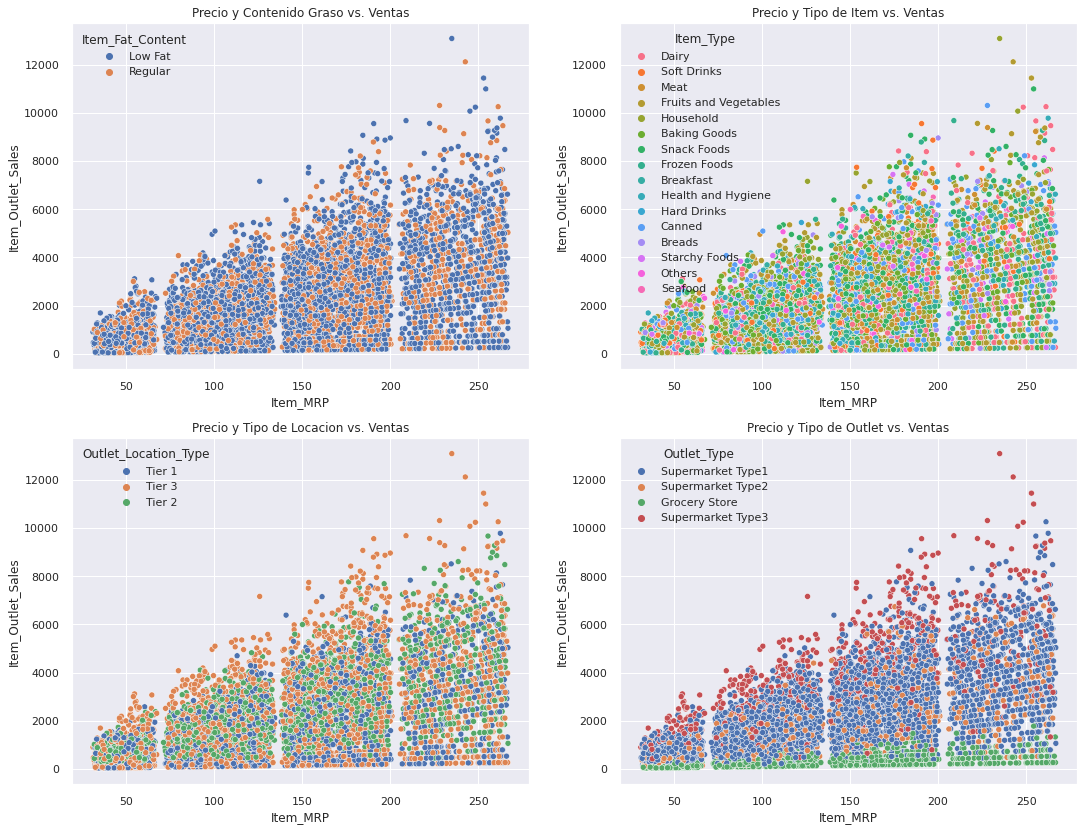

In [76]:
plt.figure(figsize=(18,14))
# Subplot 1
plt.subplot(2, 2, 1);
plt.title('Precio y Contenido Graso vs. Ventas', fontsize = 12);
sns.scatterplot(data=df, x='Item_MRP', y='Item_Outlet_Sales', hue="Item_Fat_Content");  
# Subplot 2
plt.subplot(2, 2, 2);
plt.title('Precio y Tipo de Item vs. Ventas', fontsize = 12);
sns.scatterplot(data=df, x='Item_MRP', y='Item_Outlet_Sales', hue="Item_Type");
# Subplot 3
plt.subplot(2, 2, 3);
plt.title('Precio y Tipo de Locacion vs. Ventas', fontsize = 12);
sns.scatterplot(data=df, x='Item_MRP', y='Item_Outlet_Sales', hue="Outlet_Location_Type")
# Subplot 4
plt.subplot(2, 2, 4);
plt.title('Precio y Tipo de Outlet vs. Ventas', fontsize = 12);
sns.scatterplot(data=df, x='Item_MRP', y='Item_Outlet_Sales', hue="Outlet_Type");
plt.show()

## 1) Modelo de Regresion Lineal para predecir las ventas

In [77]:
# Instanciamiento del modelo
reg = LinearRegression()

In [78]:
# ajuste de las variables de entrenamiento al modelo
reg.fit(X_train_df, y_train)


LinearRegression()

In [79]:
# Evaluacion del modelo
train_score = reg.score(X_train_df, y_train)
test_score = reg.score(X_test_df, y_test)
print(train_score)
print(test_score)


0.5604005912362504
0.5660205043958197


In [80]:
# Obtencion de las predicciones del conjunto de entrenamiento
train_preds = reg.predict(X_train_df)
# Obtengan las predicciones del conjunto de prueba
test_preds = reg.predict(X_test_df)
# lista de valores reales para el modelo Tree
Reg_y_true = list(y_test) 
# lista de valores predichos
Reg_y_pred = list(reg.predict(X_test_df)) 

In [81]:
# coeficiente de determinación R2
Reg_r2_train = r2_score(y_train, train_preds).round(2)
Reg_r2_test = r2_score(y_test, test_preds).round(2)
# cálculo del error absoluto medio (EAM)
Reg_mae_train = mean_absolute_error(y_train, train_preds).round(2)
Reg_mae_test = mean_absolute_error(y_test, test_preds).round(2)
# cálculo del error cuadrático medio (ECM)
Reg_mse_train = mean_squared_error(y_train, train_preds).round(2)
Reg_mse_test = mean_squared_error(y_test, test_preds).round(2)
# cálculo de la raíz del error cuadrático medio (RECM)
Reg_rmse_train = np.sqrt(Reg_mse_train).round(2)
Reg_rmse_test = np.sqrt(Reg_mse_test).round(2)
# Dataframe de Metricas de este modelo:
Reg_metricas = pd.DataFrame()
Reg_metricas['Modelo'] = ["RL: y_train", "RL: y_test"]
Reg_metricas['R2'] = [Reg_r2_train, Reg_r2_test]
Reg_metricas['EAM'] = [Reg_mae_train, Reg_mae_test]
Reg_metricas['ECM'] = [Reg_mse_train, Reg_mse_test]
Reg_metricas['RECM'] = [Reg_rmse_train, Reg_rmse_train]
Reg_metricas

,Modelo,R2,EAM,ECM,RECM
0,RL: y_train,0.56,847.62,1300974.98,1140.6
1,RL: y_test,0.57,804.73,1197339.57,1140.6


**Evaluacion**:

Del cuadro de resultados mostrados, vemos que si bien los coeficientes de determinacion (r2) son muy similares para la variable de entrenamiento como la de prueba, estos no resultan muy elevados: sin embargo, la metrica RECM nos da un valor relativamente pequeño como desviacion de la media de la variable objetivo para la magnitud de la data de dicha variable.

## 2) Modelo de Regresion Lineal para predecir las ventas

In [82]:
# Instanciamiento del modelo
tree = DecisionTreeRegressor()

In [83]:
# ajuste de las variables de entrenamiento al modelo
tree.fit(X_train_df, y_train)

DecisionTreeRegressor()

In [84]:
# Evaluacion del modelo
train_score = tree.score(X_train_df, y_train)
test_score = tree.score(X_test_df, y_test)
print(train_score)
print(test_score)

0.9977770846382567
0.1448662635482334


* El valor del coeficiente de determinacion obtenido por el modelo muestra un sobreajuste en la variable de entrenamiento y una diferencia muy grande con el de la variable de prueba, por lo que se analizara la maxima profundidad del arbol para ver una mejora en el modelo.

In [85]:
# revision de parametros usados por defecto
tree.get_params()


{'ccp_alpha': 0.0,
 'criterion': 'squared_error',
 'max_depth': None,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'random_state': None,
 'splitter': 'best'}

In [86]:
print(f"# Profundidad del árbol por defecto: {tree.get_depth()}")
print(f"# Numero de nodos hojas: {tree.get_n_leaves()}")


# Profundidad del árbol por defecto: 40
# Numero de nodos hojas: 6245


* A cotinuacion se buscara el max_depth optimo como ajuste del hiperparametro

In [87]:
# Lista de valores a probar para max_depth:
max_depth_range = list(range(1, 80)) # buscaremos hasta el doble de la profundidad
# Lista para almacenar la puntuación para cada valor de max_depth:
r2 = []
for depth in max_depth_range:
  tree = DecisionTreeRegressor(max_depth = depth, random_state = 42) # Instanciemiento del modelo
  tree.fit(X_train_df, y_train) # ajuste usando las variables de entrenamiento
  score = tree.score(X_test_df, y_test) # calculo del r2 con las variables de prueba
  r2.append(score)

In [88]:
print("Valores encontrados para r2 por cada valor de max_depth:")
print(r2)

Valores encontrados para r2 por cada valor de max_depth:
[0.2296825886952032, 0.4337775044707167, 0.5242218617296539, 0.5840048628592629, 0.5957680420497304, 0.5837742764963072, 0.5816341240733631, 0.5695358670911177, 0.552763739868495, 0.521230724635243, 0.49162836369495055, 0.45382027036910577, 0.419713009781153, 0.41591469405320114, 0.38701686319468054, 0.33566851113125284, 0.31192699254115575, 0.27356573582221533, 0.26511311181167574, 0.2565126007811551, 0.22309997796992598, 0.20783501523597292, 0.19667526628462595, 0.20249483428183734, 0.1853666657022014, 0.1537025462801812, 0.1694170232310218, 0.161567444134199, 0.1777315614639241, 0.15898625736605054, 0.17591544891786526, 0.15623333285291852, 0.15173251801617837, 0.16756582410762288, 0.15780308528773979, 0.14947739847965025, 0.16314702427178163, 0.1598666031611755, 0.16842980769255356, 0.16047477919202235, 0.16047477919202235, 0.16047477919202235, 0.16047477919202235, 0.16047477919202235, 0.16047477919202235, 0.16047477919202235

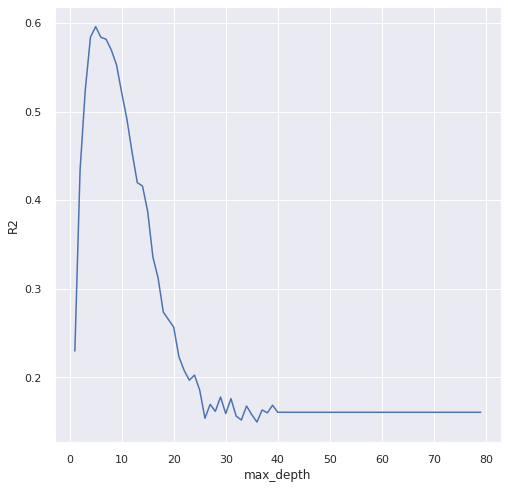

In [89]:
# Visualizacion para elegir qué max_depth lleva a una puntuación R2 más alta
import matplotlib.pyplot as plt
plt.plot(max_depth_range, r2)
plt.xlabel('max_depth')
plt.ylabel('R2');

* Del grafico y los valores resultantes, vemos que el mejor coeficiente de determinacion nos lo da una maxima profundida del arbol de 5.

In [90]:
# Ejecucion del modelo con el valor optimizado para max_depth de 5
tree = DecisionTreeRegressor(max_depth = 5, random_state = 42)
tree.fit(X_train_df, y_train)
train_score = tree.score(X_train_df, y_train)
test_score = tree.score(X_test_df, y_test)
print(train_score)
print(test_score)


0.6037426008184527
0.5957680420497304


* Si bien el valor del coeficiente de determinacion de la variable de entrenamiento se redujo, el valor del de la variable de prueba se ha incrementado reduciendose notablemente la diferencia entre ambas

In [91]:
# Obtencion de las predicciones del conjunto de entrenamiento
train_preds = tree.predict(X_train_df)
# Obtengan las predicciones del conjunto de prueba
test_preds = tree.predict(X_test_df)
# lista de valores reales para el modelo Tree
Tree_y_true = list(y_test) 
# lista de valores predichos
Tree_y_pred = list(tree.predict(X_test_df))

In [92]:
# coeficiente de determinación R2
Tree_r2_train = r2_score(y_train, train_preds).round(2)
Tree_r2_test = r2_score(y_test, test_preds).round(2)
# cálculo del error absoluto medio (EAM)
Tree_mae_train = mean_absolute_error(y_train, train_preds).round(2)
Tree_mae_test = mean_absolute_error(y_test, test_preds).round(2)
# cálculo del error cuadrático medio (ECM)
Tree_mse_train = mean_squared_error(y_train, train_preds).round(2)
Tree_mse_test = mean_squared_error(y_test, test_preds).round(2)
# cálculo de la raíz del error cuadrático medio (RECM)
Tree_rmse_train = np.sqrt(Tree_mse_train).round(2)
Tree_rmse_test = np.sqrt(Tree_mse_test).round(2)
# Dataframe de Metricas de este modelo:
Tree_metricas = pd.DataFrame()
Tree_metricas['Modelo'] = ["RL: y_train", "RL: y_test"]
Tree_metricas['R2'] = [Tree_r2_train, Tree_r2_test]
Tree_metricas['EAM'] = [Tree_mae_train, Tree_mae_test]
Tree_metricas['ECM'] = [Tree_mse_train, Tree_mse_test]
Tree_metricas['RECM'] = [Tree_rmse_train, Tree_rmse_train]
Tree_metricas

,Modelo,R2,EAM,ECM,RECM
0,RL: y_train,0.6,762.60,1172706.22,1082.92
1,RL: y_test,0.6,737.81,1115266.79,1082.92


**Evaluacion**:

Del cuadro de resultados mostrados, vemos que los coeficientes de determinacion (r2) son iguales para ambas variables de entrenamiento y de prueba y aunque estan lejos del mejor valor: es decir 1, la metrica RECM nos da un valor relativamente pequeño como desviacion de la media de la variable objetivo para la magnitud de la data de dicha variable.

## 3) Recomendacion del modelo a utilizar

* Visualizacion de los resultados

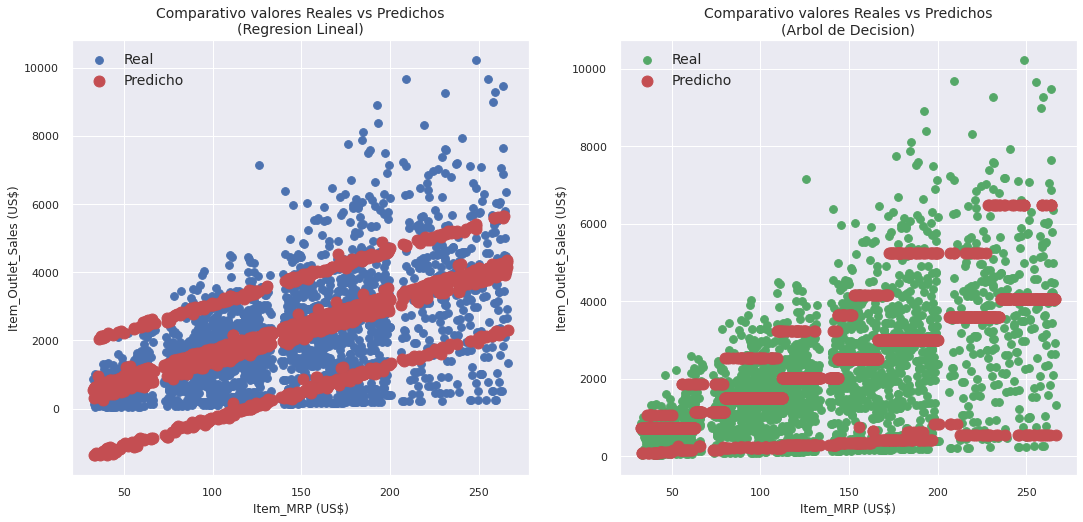

In [93]:
# imresion de valores reales y predichos 
plt.figure(figsize=(18,8))
# Subplot 1
plt.subplot(1, 2, 1);
plt.title('Comparativo valores Reales vs Predichos\n(Regresion Lineal)', fontsize = 14);
plt.scatter(X_test['Item_MRP'], Reg_y_true, s=60, c='b', label="Real")
plt.scatter(X_test['Item_MRP'], Reg_y_pred, s=120, c='r', label="Predicho")
plt.ylabel('Item_Outlet_Sales (US$)', fontsize = 12)
plt.xlabel('Item_MRP (US$)', fontsize = 12)
plt.legend(fontsize=14);
# Subplot 2
plt.subplot(1, 2, 2);
plt.title('Comparativo valores Reales vs Predichos\n(Arbol de Decision)', fontsize = 14);
plt.scatter(X_test['Item_MRP'], Tree_y_true, s=60, c='g', label='Real')
plt.scatter(X_test['Item_MRP'], Tree_y_pred, s=120, c='r', label='Predicho') 
plt.ylabel('Item_Outlet_Sales (US$)', fontsize = 12)
plt.xlabel('Item_MRP (US$)', fontsize = 12)
plt.legend(fontsize=14);
plt.show()

* Los graficos evidencian una mayor concentracion de los datos predichos con el modelo dentro  de los resultados reales de la variable de prueba para las ventas (Item_Outlet_Sales) en el caso del Arbol de Decision. Para el grafico se utilzo la caracteristic Precio (Item_MRP) ya que presenta la mejor correlacion respecto a la variable objetivo.

In [94]:
# revision de datos estadisticos de la variable objetivo
y.describe()

count     8523.000000
mean      2181.288914
std       1706.499616
min         33.290000
25%        834.247400
50%       1794.331000
75%       3101.296400
max      13086.964800
Name: Item_Outlet_Sales, dtype: float64

* Comparacion de resultados

In [95]:
print (f"Comparacion de metricas de cada modelo:\n\n{Reg_metricas}\n\n{Tree_metricas}")

Comparacion de metricas de cada modelo:

        Modelo    R2     EAM         ECM    RECM
0  RL: y_train  0.56  847.62  1300974.98  1140.6
1   RL: y_test  0.57  804.73  1197339.57  1140.6

        Modelo   R2     EAM         ECM     RECM
0  RL: y_train  0.6  762.60  1172706.22  1082.92
1   RL: y_test  0.6  737.81  1115266.79  1082.92


## Conclusiones a Parte Final:

Por los resultados obtenidos, los cuales se resumen a continuacion: 

|                  Metrica                 |       Modelo: | Regresion Lineal |       Modelo: | Arbol de Decision |
|:----------------------------------------:|--------------:|------------------|--------------:|-------------------|
|  --------------------------------------- | Entrenamiento |           Prueba | Entrenamiento |            Prueba |
| Coeficiente de determinacion (R2)------- |          0.56 |             0.57 |          0.60 |              0.60 |
| Raíz del error cuadrático medio (RECM)-  |        1140.6 |           1140.6 |       1082.92 |           1082.92 |

Se recomienda el modelo Arbol de Decision con un profundidad maxima de 5 por las siguientes razones:

 i) El coeficiente de determinacion es mas alto

 ii) La raiz del error cuadratico medio, representando el error medio de los resultados con respecto a la media es menor.
 
 iii) Respecto a los valores estadisticos de la data original, el error es menor a la desviacion estandar de la data original de la variable objetivo 

### Conclusion Final:

En el presente proyecto se han aplicado los conocimientos adquiridos sobre los Fundamentos de Python, Numpy y Pandas, ejectando codigos para la revision, evaluacion y tratamiento de la data, asi como graficas que han permitido visuallizar el comportamiento de las mismas antes de aplicar los conocimiento de Aprendizaje Automatico Supervisado a traves de dos modelos de regresion: Regresion Lineal y Arbol de Decisiones, evaluando las metricas de cada modelo y seleccionando aquella que tiene los mejores valores en cuanto a coeficiente de determinacion y menores valores de error de los datos resultantes con respecto a su media.

Si bien el coeficiente de determinacion obtenido para el modelo recomendado es bastante menor de 1, para efectos de este proyecto lo que se ha buscado es mostrar los criterios de evaluacion para determinar el modelo mas adecuado a recomendar.

Existen otros modelos que podrian revisarse como el Bosque Aleaotrio, Bagged Tree, KNN vecinos proximos, entre otros para evaluar un mejor modelo, pero como se ha indicado, solo se han usado dos modelos con fines de mostrar la metodologia para evalacion de los modelos de aprendizaje automatico.

Respecto a las recomendaciones al minorista, el modelo de apredizaje Arbol de Decisiones le ayudara a predecir las ventas de sus productos, pero tal como se indico en las conclusiones a la Parte 4, en los Supermercados Tipo 1 hay una preferenica mucho mayor por los productos de menor contenido graso y las ventas en el Supermercado Tipo 1 son sumamente importantes ya que representan el 69.5% del total de las ventas, seguido por los Supermercados tipo 3, considerando ambos se supera el 80% de las ventas totales que requieren un mayor control del abastecimiento de productos de bajo contenido calorico frente a los del tipo regular por lo que habra que tener en consideracion el cuidado que se le de a la atencion de los productos Low Fat. 

# Referencias

* [Curso Regression Models](https://github.com/fralfaro/CodingDojo-DataScience/blob/main/docs/6-RegressionModels/6-RegressionModels.ipynb)
* [Curso MAT281_2022](https://github.com/fralfaro/MAT281_2022)
* [Curso CodingDojo-DataScience](https://github.com/fralfaro/CodingDojo-DataScience)
* [Pandas](file:///C:/Users/dpala/Documents/Coding_dojo-data-science/Python_intro/Los_fundamentos/2-Pandas.ipynb%20-%20Colaboratory.pdf)
* [Visualizaciones](file:///C:/Users/dpala/Documents/Coding_dojo-data-science/Python_intro/Los_fundamentos/Visualizacion.pdf)
* [Matploib](file:///C:/Users/dpala/Documents/Coding_dojo-data-science/Python_intro/Los_fundamentos/Matplotlib%20-%20Home.pdf)